<a href="https://colab.research.google.com/github/davichiar/2020_sos-masters/blob/master/advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day9. 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 64kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=1fc43ad1b17dcbe157c6324400768f55a3a76de0e6dc83211bd1e18bdfabcff3
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [ ]:
image_path = "/gdrive/My Drive/gg01.jpg"

In [ ]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [ ]:
for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

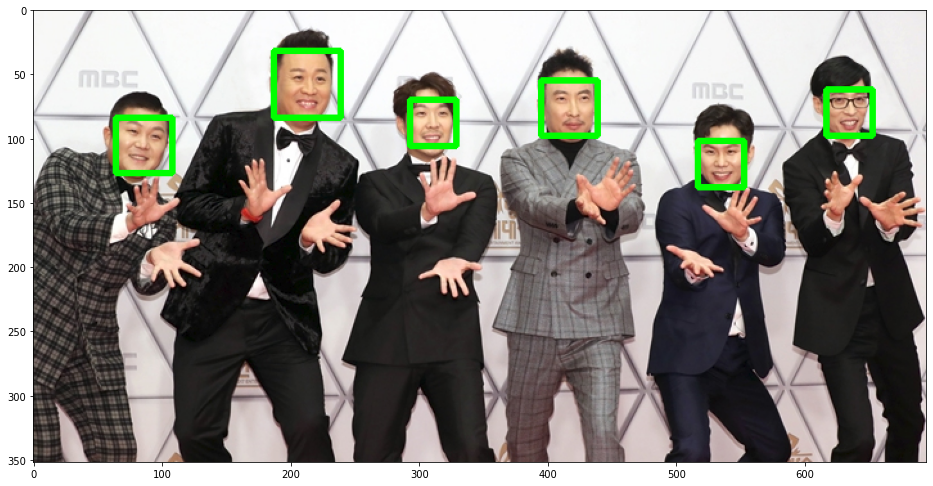

In [ ]:
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [ ]:
plt.rcParams["figure.figsize"] = (1, 1)

known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/person1.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/person2.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/person3.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/person4.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/person5.jpg"))

In [ ]:
known_face_list = []
for person in known_person_list:
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  known_face_list.append(face_image)

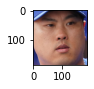

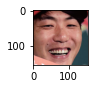

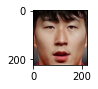

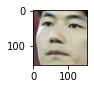

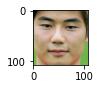

In [ ]:
for face in known_face_list:
  plt.imshow(face)
  plt.show()

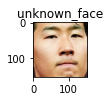

In [ ]:
unknown_person = fr.load_image_file("/gdrive/My Drive/unknown.jpg")

top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

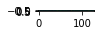

In [ ]:
enc_unknown_face = fr.face_encodings(unknown_face)

plt.imshow(enc_unknown_face)
plt.show()

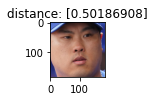

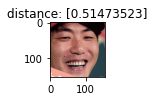

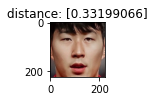

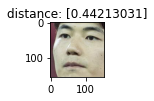

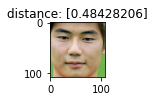

In [ ]:
for face in known_face_list:
  enc_known_face = fr.face_encodings(face)

  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  plt.title("distance: " + str(distance))
  plt.imshow(face)
  plt.show()